In [1]:
# !pip install lightgbm

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pickle
from datetime import datetime
import numpy as np
import pandas as pd
from scipy.sparse import hstack
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
#from tqdm import tqdm
# import lightgbm as lgb

In [3]:
# load the features and the target variable

file = open('./preprocess_outputs/y_train', 'rb')
y_train = pickle.load(file)
file.close()
file = open('./preprocess_outputs/y_test', 'rb')
y_test = pickle.load(file)
file.close()
print("y_train.shape= {}".ljust(50, "-").format(y_train.shape), "y_test.shape= {}".format(y_test.shape))

file = open('./preprocess_outputs/y_log_train', 'rb')
y_log_train = pickle.load(file)
file.close()
file = open('./preprocess_outputs/y_log_test', 'rb')
y_log_test = pickle.load(file)
file.close()
print("y_log_train.shape= {}".ljust(50, "-").format(y_log_train.shape), "y_log_test.shape= {}".format(y_log_test.shape))

file = open('./preprocess_outputs/train_brand_encode', 'rb')
train_brand_encode = pickle.load(file)
file.close()
file = open('./preprocess_outputs/test_brand_encode', 'rb')
test_brand_encode = pickle.load(file)
file.close()
print("train_brand_encode.shape= {}".ljust(50, "-").format(train_brand_encode.shape), "test_brand_encode.shape= {}".format(test_brand_encode.shape))

file = open('./preprocess_outputs/train_shipping_ohe', 'rb')
train_shipping_ohe = pickle.load(file)
file.close()
file = open('./preprocess_outputs/test_shipping_ohe', 'rb')
test_shipping_ohe = pickle.load(file)
file.close()
print("train_shipping_ohe.shape= {}".ljust(50, "-").format(train_shipping_ohe.shape), "test_shipping_ohe.shape= {}".format(test_shipping_ohe.shape))

file = open('./preprocess_outputs/train_item_cond_ohe', 'rb')
train_item_cond_ohe = pickle.load(file)
file.close()
file = open('./preprocess_outputs/test_item_cond_ohe', 'rb')
test_item_cond_ohe = pickle.load(file)
file.close()
print("train_item_cond_ohe.shape= {}".ljust(50, "-").format(train_item_cond_ohe.shape), "test_item_cond_ohe.shape= {}".format(test_item_cond_ohe.shape))

file = open('./preprocess_outputs/train_branded_ohe', 'rb')
train_branded_ohe = pickle.load(file)
file.close()
file = open('./preprocess_outputs/test_branded_ohe', 'rb')
test_branded_ohe = pickle.load(file)
file.close()
print("train_branded_ohe.shape= {}".ljust(50, "-").format(train_branded_ohe.shape), "test_branded_ohe.shape= {}".format(test_branded_ohe.shape))

file = open('./preprocess_outputs/train_desc_tfidf', 'rb')
train_desc_tfidf = pickle.load(file)
file.close()
file = open('./preprocess_outputs/test_desc_tfidf', 'rb')
test_desc_tfidf = pickle.load(file)
file.close()
print("train_desc_tfidf.shape= {}".ljust(50, "-").format(train_desc_tfidf.shape), "test_desc_tfidf.shape= {}".format(test_desc_tfidf.shape))

file = open('./preprocess_outputs/train_cat_bow', 'rb')
train_cat_bow = pickle.load(file)
file.close()
file = open('./preprocess_outputs/test_cat_bow', 'rb')
test_cat_bow = pickle.load(file)
file.close()
print("train_cat_bow.shape= {}".ljust(50, "-").format(train_cat_bow.shape), "test_cat_bow.shape= {}".format(test_cat_bow.shape))

file = open('./preprocess_outputs/train_grouped_mean_std', 'rb')
train_grouped_mean_std = pickle.load(file)
file.close()
file = open('./preprocess_outputs/test_grouped_mean_std', 'rb')
test_grouped_mean_std = pickle.load(file)
file.close()
print("train_grouped_mean_std.shape= {}".ljust(50, "-").format(train_grouped_mean_std.shape), "test_grouped_mean_std.shape= {}".format(test_grouped_mean_std.shape))

file = open('./preprocess_outputs/train_desc_senti', 'rb')
train_desc_senti = pickle.load(file)
file.close()
file = open('./preprocess_outputs/test_desc_senti', 'rb')
test_desc_senti = pickle.load(file)
file.close()
print("train_desc_senti.shape= {}".ljust(50, "-").format(train_desc_senti.shape), "test_desc_senti.shape= {}".format(test_desc_senti.shape))

y_train.shape= (993295,)--------------------------------- y_test.shape= (489236,)
y_log_train.shape= (993295,)----------------------------- y_log_test.shape= (489236,)
train_brand_encode.shape= (993295, 82230)---------------------- test_brand_encode.shape= (489236, 82230)
train_shipping_ohe.shape= (993295, 2)---------------------- test_shipping_ohe.shape= (489236, 2)
train_item_cond_ohe.shape= (993295, 5)--------------------- test_item_cond_ohe.shape= (489236, 5)
train_branded_ohe.shape= (993295, 2)----------------------- test_branded_ohe.shape= (489236, 2)
train_desc_tfidf.shape= (993295, 1000000)------------------------ test_desc_tfidf.shape= (489236, 1000000)
train_cat_bow.shape= (993295, 1117)--------------------------- test_cat_bow.shape= (489236, 1117)
train_grouped_mean_std.shape= (993295, 1)------------------ test_grouped_mean_std.shape= (489236, 1)
train_desc_senti.shape= (993295, 1)------------------------ test_desc_senti.shape= (489236, 1)


In [24]:
# preparation of X_train and X_test

x_train = hstack((train_brand_encode, train_shipping_ohe, train_item_cond_ohe, train_branded_ohe, train_desc_tfidf,
                 train_cat_bow, train_grouped_mean_std, train_desc_senti)).tocsr().astype('float32')

x_test = hstack((test_brand_encode, test_shipping_ohe, test_item_cond_ohe, test_branded_ohe, test_desc_tfidf,
                 test_cat_bow, test_grouped_mean_std, test_desc_senti)).tocsr().astype('float32')

print(x_train.shape)
print(x_test.shape)

(993295, 1083358)
(489236, 1083358)


## Evaluation Metric

In [5]:
#https://www.kaggle.com/questions-and-answers/60012

def rmsle_score(y, y_pred):
    return(np.sqrt(mean_squared_log_error(y, y_pred)))

In [6]:
#https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html
# see notes section below the fit function

def rmsle_lgb(y_true, y_pred):
    return 'rmsle_lgb',rmsle_score(y_true, y_pred),False

## Ridge model

In [7]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

ridge_model = Ridge(solver='lsqr', fit_intercept=False)

In [8]:
print(datetime.now())

2020-10-02 13:18:15.345913


In [9]:
%%time

solver = ['lsqr', 'cholesky', 'saga']
params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

gs_ridge = GridSearchCV(estimator=ridge_model,
                       param_grid=params,
                       cv=3,
                       scoring='neg_mean_squared_error',
                       verbose=1,
                       return_train_score=True,
                       n_jobs=-1)
# gs_ridge.fit(x_train, y_train)
gs_ridge.fit(x_train, y_log_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 14.0min finished


Wall time: 14min 58s


GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=False,
                             max_iter=None, normalize=False, random_state=None,
                             solver='lsqr', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [10]:
print(datetime.now())

2020-10-02 13:33:13.639578


In [11]:
results = pd.DataFrame.from_dict(gs_ridge.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,181.013951,18.778682,0.333308,0.014729,0.0001,{'alpha': 0.0001},-0.260811,-0.258323,-0.264056,-0.261063,0.002347,4,-0.235423,-0.233592,-0.245942,-0.238319,0.005442
1,186.610148,17.761240,0.354147,0.019487,0.001,{'alpha': 0.001},-0.260810,-0.258322,-0.264055,-0.261063,0.002347,3,-0.235423,-0.233592,-0.245942,-0.238319,0.005442
2,188.002089,21.670340,0.307272,0.032108,0.01,{'alpha': 0.01},-0.260801,-0.258312,-0.264052,-0.261055,0.002350,2,-0.235423,-0.233592,-0.245942,-0.238319,0.005442
3,180.021341,19.099196,0.291649,0.026554,0.1,{'alpha': 0.1},-0.260716,-0.258209,-0.264016,-0.260980,0.002378,1,-0.235425,-0.233594,-0.245943,-0.238321,0.005441
4,161.959487,14.089168,0.291646,0.019486,1,{'alpha': 1},-0.259992,-0.260868,-0.263703,-0.261521,0.001584,5,-0.235535,-0.243376,-0.245986,-0.241632,0.004441
5,123.590563,5.866725,0.239566,0.026561,10,{'alpha': 10},-0.268994,-0.262851,-0.265893,-0.265913,0.002508,6,-0.257347,-0.251485,-0.252932,-0.253922,0.002493
6,66.135091,11.221903,0.218729,0.077593,100,{'alpha': 100},-0.287785,-0.285709,-0.288125,-0.287206,0.001068,7,-0.283263,-0.284273,-0.283183,-0.283573,0.000496


In [12]:
results.sort_values(['mean_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
6,66.135091,11.221903,0.218729,0.077593,100,{'alpha': 100},-0.287785,-0.285709,-0.288125,-0.287206,0.001068,7,-0.283263,-0.284273,-0.283183,-0.283573,0.000496
5,123.590563,5.866725,0.239566,0.026561,10,{'alpha': 10},-0.268994,-0.262851,-0.265893,-0.265913,0.002508,6,-0.257347,-0.251485,-0.252932,-0.253922,0.002493
4,161.959487,14.089168,0.291646,0.019486,1,{'alpha': 1},-0.259992,-0.260868,-0.263703,-0.261521,0.001584,5,-0.235535,-0.243376,-0.245986,-0.241632,0.004441
0,181.013951,18.778682,0.333308,0.014729,0.0001,{'alpha': 0.0001},-0.260811,-0.258323,-0.264056,-0.261063,0.002347,4,-0.235423,-0.233592,-0.245942,-0.238319,0.005442
1,186.610148,17.761240,0.354147,0.019487,0.001,{'alpha': 0.001},-0.260810,-0.258322,-0.264055,-0.261063,0.002347,3,-0.235423,-0.233592,-0.245942,-0.238319,0.005442
2,188.002089,21.670340,0.307272,0.032108,0.01,{'alpha': 0.01},-0.260801,-0.258312,-0.264052,-0.261055,0.002350,2,-0.235423,-0.233592,-0.245942,-0.238319,0.005442
3,180.021341,19.099196,0.291649,0.026554,0.1,{'alpha': 0.1},-0.260716,-0.258209,-0.264016,-0.260980,0.002378,1,-0.235425,-0.233594,-0.245943,-0.238321,0.005441


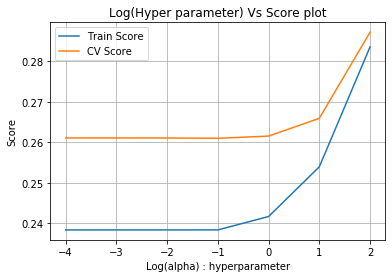

In [13]:
# plotting the results

train_score = results['mean_train_score']*-1
cv_score = results['mean_test_score'] *-1

plt.plot(np.log10(list(results['param_alpha'].values)), train_score, label='Train Score')
plt.plot(np.log10(list(results['param_alpha'].values)), cv_score, label='CV Score')
plt.legend()
plt.xlabel("Log(alpha) : hyperparameter")
plt.ylabel("Score")
plt.title("Log(Hyper parameter) Vs Score plot")
plt.grid()
plt.show()

In [14]:
print("Best Estimator ",gs_ridge.best_estimator_)

Best Estimator  Ridge(alpha=0.1, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='lsqr', tol=0.001)


__For alpha=0.1, cross validationn score is lowest, and closest to Train score. Hence, we train the model with this hyperparameter.__

In [15]:
%%time

ridge_model = Ridge(solver = "lsqr", fit_intercept=False,alpha = 0.1)
# ridge_model.fit(x_train, y_train)
ridge_model.fit(x_train, y_log_train)

Wall time: 57.7 s


Ridge(alpha=0.1, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='lsqr', tol=0.001)

In [16]:
pickle.dump(ridge_model, open('./models/ridge_model', 'wb'))

__Evaluations__

In [17]:
ridge_model = pickle.load(open('./models/ridge_model', 'rb'))

In [18]:
print('Train RMSLE = ',rmsle_score(np.float64(y_train) , np.expm1(ridge_model.predict(x_train))))
print('Test RMSLE = ',rmsle_score(np.float64(y_test) , np.expm1(ridge_model.predict(x_test))))

Train RMSLE =  0.5053840510113513
Test RMSLE =  0.5225105665803988
